In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import scale
import sklearn
%matplotlib inline

In [25]:
trip_dataset = pd.read_csv('../Datasets/trip_dataset.csv')

In [26]:
x = trip_dataset[['pickup_longitude','pickup_latitude','dropoff_longitude',
                 'dropoff_latitude','pickup_datetime_int','distance','rain','temp','snow','rain']].fillna(0)

#x = scale(x)

In [27]:
trip_dataset['trip_duration'] = np.log(trip_dataset['trip_duration'])
y = trip_dataset['trip_duration']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [29]:
model = Lasso()
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
Y_pred = model.predict(X_train)
#RMSE on train data
print(np.sqrt(metrics.mean_squared_error(y_train, Y_pred)))

1.29922288028


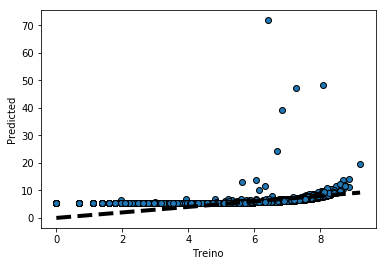

In [31]:
#http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py
fig, ax = plt.subplots()
ax.scatter(y_train, Y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Treino')
ax.set_ylabel('Predicted')
plt.show()

In [32]:
Y_pred = model.predict(X_test)
#RMSE on test data
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

1.65083034441


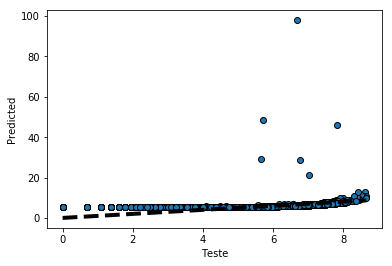

In [33]:
#http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py
fig, ax = plt.subplots()
ax.scatter(y_test, Y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Teste')
ax.set_ylabel('Predicted')
plt.show()

In [34]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = Lasso()

In [35]:
results = model_selection.cross_val_score(model, x, y, cv=kfold)
Y_pred =  model_selection.cross_val_predict(model, x, y, cv=kfold)
print(results.mean())

0.205962407325


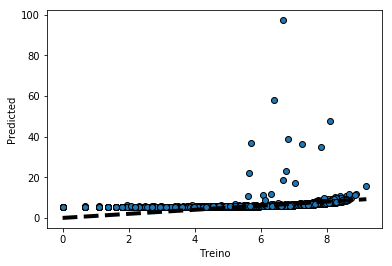

In [36]:
#http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py
fig, ax = plt.subplots()
ax.scatter(y, Y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Treino')
ax.set_ylabel('Predicted')
plt.show()